In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix

# deep learning libraries
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import applications
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image

import cv2

import warnings
warnings.filterwarnings('ignore')
from PIL import Image

In [3]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from keras.layers import BatchNormalization
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from keras import backend as K
from tensorflow.keras.utils import to_categorical,load_img
from tensorflow.python.keras.preprocessing.image import load_img,img_to_array

In [4]:
print(tf.__version__)

2.6.2


In [5]:
'''
class_names={
'abhijeet':0,
'adi':1,
'akash':2,
'ashutosh':3,
'chetan':4,
'deepak':5,
'dilip':6,
'dipesh':7,
'divya':8,
'garud':9,
'gulam':10,
'jayesh':11,
'kashish':12,
'krutik':13,
'mandar':14,
'mayur':15,
'meghana':16,
'poorva':17,
'pratham':18,
'prathamesh':19,
'ritesh':20,
'sayli':21,
'shefali':22,
'shivam':23,
'sid':24,
'siddhi':25,
'sonal':26,
'vedika':27,
'vijay':28,
'yukta':29
}
'''
class_names={
'abhijeet':0,
'adi':1,
'akash':2,
'ashutosh':3,
'chetan':4,
'deepak':5,
'dilip':6
}

In [6]:
train_path="/kaggle/input/palmvein-7-class/train"
test_path="/kaggle/input/palmvein-7-class/test"

In [7]:
#categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

In [8]:
import os
x_train=[]
train_labels=[]
for folder in sorted(os.listdir(train_path)):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img
        #print(image_path)

        img_arr=cv2.imread(image_path,0)
        img_arr=cv2.resize(img_arr,(224,224))
        img_arr=np.float32(img_arr)
        x_train.append(img_arr)
        train_labels.append(class_names[folder])

train_data =np.array(x_train)




In [9]:
train_data.shape

(5704, 224, 224)

In [10]:
#with open("/kaggle/input/palm-vein/train_labels.csv") as file_name:
#    train_label = np.loadtxt(file_name, delimiter=",")

train_labels=np.array(train_labels)
print(type(train_labels))
train_labels

<class 'numpy.ndarray'>


array([0, 0, 0, ..., 6, 6, 6])

In [11]:
print(np.unique(train_labels, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6]), array([819, 820, 813, 817, 810, 818, 807]))


In [12]:
x_test=[]
test_labels=[]
for folder in sorted(os.listdir(test_path)):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img
        #print(image_path)

        img_arr=cv2.imread(image_path,0)

        img_arr=cv2.resize(img_arr,(224,224))
        img_arr=np.float32(img_arr)

        x_test.append(img_arr)
        test_labels.append(class_names[folder])

test_data =np.array(x_test)

In [13]:
test_data.shape

(28, 224, 224)

In [14]:

test_labels=np.array(test_labels)
print(type(test_labels))
test_labels

<class 'numpy.ndarray'>


array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5,
       5, 5, 6, 6, 6, 6])

In [15]:
print(np.unique(test_labels, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6]), array([4, 4, 4, 4, 4, 4, 4]))


In [16]:
print("Training set (images) shape: {shape}".format(shape=train_data.shape))

# Shapes of test set
print("Test set (images) shape: {shape}".format(shape=test_data.shape))

Training set (images) shape: (5704, 224, 224)
Test set (images) shape: (28, 224, 224)


In [17]:
train_data = train_data.reshape(-1, 224,224, 1)
test_data = test_data.reshape(-1, 224,224, 1)
train_data.shape, test_data.shape

((5704, 224, 224, 1), (28, 224, 224, 1))

In [18]:
train_data.dtype, test_data.dtype

(dtype('float32'), dtype('float32'))

In [19]:
np.max(train_data), np.max(test_data)

(255.0, 255.0)

In [20]:
train_data = train_data / np.max(train_data)
test_data = test_data / np.max(test_data)
np.max(train_data), np.max(test_data)

(1.0, 1.0)

In [21]:

from sklearn.model_selection import train_test_split
train_X,valid_X,train_ground,valid_ground = train_test_split(train_data,
                                                             train_data,
                                                             test_size=0.2,
                                                             random_state=13)


In [22]:
batch_size = 64
epochs = 200
inChannel = 1
x, y = 224, 224
input_img = Input(shape = (x, y, inChannel))
num_classes = len(class_names)
num_classes

7

In [23]:

def encoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 256 (small and thick)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    return conv4

def decoder(conv4):    
    #decoder
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4) #7 x 7 x 128
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv5) #7 x 7 x 64
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)
    up1 = UpSampling2D((2,2))(conv6) #14 x 14 x 64
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 32
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)
    up2 = UpSampling2D((2,2))(conv7) # 28 x 28 x 32
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
    return decoded

In [24]:

autoencoder = Model(input_img, decoder(encoder(input_img)))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())
#autoencoder.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

2022-03-15 06:46:20.436635: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-15 06:46:20.446671: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-15 06:46:20.447396: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-15 06:46:20.448590: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [25]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      18496 

In [26]:
autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_ground))

2022-03-15 06:46:21.632182: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 915812352 exceeds 10% of free system memory.
2022-03-15 06:46:22.525488: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 915812352 exceeds 10% of free system memory.
2022-03-15 06:46:23.444839: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 915812352 exceeds 10% of free system memory.
2022-03-15 06:46:24.100297: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 915812352 exceeds 10% of free system memory.
2022-03-15 06:46:24.778284: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200


2022-03-15 06:46:27.719331: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


72/72 [==============================] - 38s 411ms/step - loss: 0.0839 - val_loss: 0.1067
Epoch 2/200
72/72 [==============================] - 24s 330ms/step - loss: 0.0339 - val_loss: 0.1021
Epoch 3/200
72/72 [==============================] - 24s 330ms/step - loss: 0.0250 - val_loss: 0.0478
Epoch 4/200
72/72 [==============================] - 24s 329ms/step - loss: 0.0196 - val_loss: 0.0298
Epoch 5/200
72/72 [==============================] - 24s 330ms/step - loss: 0.0168 - val_loss: 0.0245
Epoch 6/200
72/72 [==============================] - 24s 329ms/step - loss: 0.0151 - val_loss: 0.0195
Epoch 7/200
72/72 [==============================] - 24s 329ms/step - loss: 0.0134 - val_loss: 0.0148
Epoch 8/200
72/72 [==============================] - 24s 330ms/step - loss: 0.0121 - val_loss: 0.0161
Epoch 9/200
72/72 [==============================] - 24s 330ms/step - loss: 0.0110 - val_loss: 0.0135
Epoch 10/200
72/72 [==============================] - 24s 329ms/step - loss: 0.0100 - val_loss

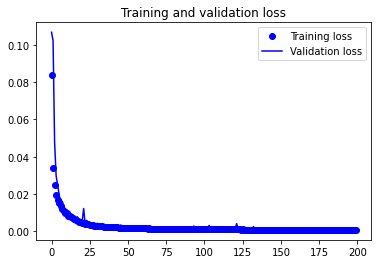

In [27]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(200)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [28]:
autoencoder.save_weights('./checkpoints/my_checkpoint')

In [29]:
train_Y_one_hot = to_categorical(train_labels)
test_Y_one_hot = to_categorical(test_labels)

# Display the change for category label using one-hot encoding
print('Original label:', train_labels[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 0
After conversion to one-hot: [1. 0. 0. 0. 0. 0. 0.]


In [30]:
train_X,valid_X,train_label,valid_label = train_test_split(train_data,train_Y_one_hot,test_size=0.2,random_state=13)

In [31]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((4563, 224, 224, 1), (1141, 224, 224, 1), (4563, 7), (1141, 7))

In [32]:
def encoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 256 (small and thick)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    return conv4

In [33]:
def fc(enco):
    flat = Flatten()(enco)
    den = Dense(128, activation='relu')(flat)
    out = Dense(num_classes, activation='softmax')(den)
    return out

In [34]:
encode = encoder(input_img)
full_model = Model(input_img,fc(encode))

In [35]:
for l1,l2 in zip(full_model.layers[:19],autoencoder.layers[0:19]):
    l1.set_weights(l2.get_weights())

In [36]:
autoencoder.get_weights()[0][1]

array([[[-9.5505051e-02, -3.6582198e-02, -7.8881167e-02, -2.0320070e-01,
         -1.4782877e-01,  1.4184488e-01,  2.7448255e-01, -1.8589623e-02,
         -1.1453085e-01, -2.6638618e-01,  8.1022479e-02, -3.0059180e-01,
         -5.0046377e-02, -2.6600664e-02, -9.7235709e-02,  9.4118379e-02,
          1.2774114e-01, -2.7636907e-01,  4.3187961e-02,  2.3345909e-01,
         -1.0480313e-02,  1.0467896e-01, -1.5021451e-01, -1.6798260e-02,
          1.1538650e-01,  3.7015453e-01, -2.9475349e-01, -1.7080527e-02,
         -1.9933894e-01, -3.1257916e-02, -1.9266146e-01,  3.7363216e-02]],

       [[-1.4120461e-01, -1.3955368e-01,  1.0675574e-01,  2.7172472e-02,
         -1.4325929e-01,  1.0513815e-01,  1.1607439e-01,  1.3363764e-01,
          3.0858926e-02,  1.7175922e-01,  6.5086132e-01, -6.5261878e-02,
         -1.4907089e-01, -1.9116011e-01, -2.3940891e-01,  6.1340678e-01,
          1.5205296e-02,  2.5364788e-02, -1.2561424e-01,  4.8686672e-02,
          6.7169197e-02, -2.1515797e-01,  7.1754

In [37]:
full_model.get_weights()[0][1]

array([[[-9.5505051e-02, -3.6582198e-02, -7.8881167e-02, -2.0320070e-01,
         -1.4782877e-01,  1.4184488e-01,  2.7448255e-01, -1.8589623e-02,
         -1.1453085e-01, -2.6638618e-01,  8.1022479e-02, -3.0059180e-01,
         -5.0046377e-02, -2.6600664e-02, -9.7235709e-02,  9.4118379e-02,
          1.2774114e-01, -2.7636907e-01,  4.3187961e-02,  2.3345909e-01,
         -1.0480313e-02,  1.0467896e-01, -1.5021451e-01, -1.6798260e-02,
          1.1538650e-01,  3.7015453e-01, -2.9475349e-01, -1.7080527e-02,
         -1.9933894e-01, -3.1257916e-02, -1.9266146e-01,  3.7363216e-02]],

       [[-1.4120461e-01, -1.3955368e-01,  1.0675574e-01,  2.7172472e-02,
         -1.4325929e-01,  1.0513815e-01,  1.1607439e-01,  1.3363764e-01,
          3.0858926e-02,  1.7175922e-01,  6.5086132e-01, -6.5261878e-02,
         -1.4907089e-01, -1.9116011e-01, -2.3940891e-01,  6.1340678e-01,
          1.5205296e-02,  2.5364788e-02, -1.2561424e-01,  4.8686672e-02,
          6.7169197e-02, -2.1515797e-01,  7.1754

In [38]:
for layer in full_model.layers[0:19]:
    layer.trainable = False

In [39]:
full_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [40]:
full_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 1)]     0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 224, 224, 32)      320       
_________________________________________________________________
batch_normalization_14 (Batc (None, 224, 224, 32)      128       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 224, 224, 32)      9248      
_________________________________________________________________
batch_normalization_15 (Batc (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 112, 112, 64)      1849

In [41]:
classify_train = full_model.fit(train_X, train_label, batch_size=64,epochs=100,verbose=1,validation_data=(valid_X, valid_label))

2022-03-15 08:05:51.717526: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 915812352 exceeds 10% of free system memory.


Epoch 1/100
72/72 [==============================] - 7s 93ms/step - loss: 0.8370 - accuracy: 0.9741 - val_loss: 0.1672 - val_accuracy: 0.9974
Epoch 2/100
72/72 [==============================] - 6s 85ms/step - loss: 0.0682 - accuracy: 0.9987 - val_loss: 0.1950 - val_accuracy: 0.9939
Epoch 3/100
72/72 [==============================] - 6s 84ms/step - loss: 0.0167 - accuracy: 0.9996 - val_loss: 0.2391 - val_accuracy: 0.9947
Epoch 4/100
72/72 [==============================] - 6s 84ms/step - loss: 0.0061 - accuracy: 0.9998 - val_loss: 0.1573 - val_accuracy: 0.9965
Epoch 5/100
72/72 [==============================] - 6s 84ms/step - loss: 3.3963e-10 - accuracy: 1.0000 - val_loss: 0.1575 - val_accuracy: 0.9965
Epoch 6/100
72/72 [==============================] - 6s 84ms/step - loss: 3.3963e-10 - accuracy: 1.0000 - val_loss: 0.1575 - val_accuracy: 0.9965
Epoch 7/100
72/72 [==============================] - 6s 84ms/step - loss: 3.3963e-10 - accuracy: 1.0000 - val_loss: 0.1575 - val_accuracy: 0

In [42]:
full_model.save_weights('./checkpoints/my_checkpoint1')

In [43]:
for layer in full_model.layers[0:19]:
    layer.trainable = True

In [44]:
full_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
classify_train = full_model.fit(train_X, train_label, batch_size=64,epochs=100,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/100
72/72 [==============================] - 18s 238ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1563 - val_accuracy: 0.9965
Epoch 2/100
72/72 [==============================] - 17s 230ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1563 - val_accuracy: 0.9965
Epoch 3/100
72/72 [==============================] - 17s 229ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1563 - val_accuracy: 0.9965
Epoch 4/100
72/72 [==============================] - 17s 230ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1561 - val_accuracy: 0.9965
Epoch 5/100
72/72 [==============================] - 17s 230ms/step - loss: 2.6125e-11 - accuracy: 1.0000 - val_loss: 0.1586 - val_accuracy: 0.9965
Epoch 6/100
72/72 [==============================] - 17s 230ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1587 - val_accuracy: 0.9965
Epoch 7/100
72/72 [==============================] - 17s 230ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_

In [46]:
full_model.save_weights('./checkpoints/my_checkpoint2')

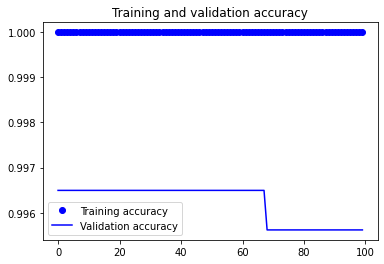

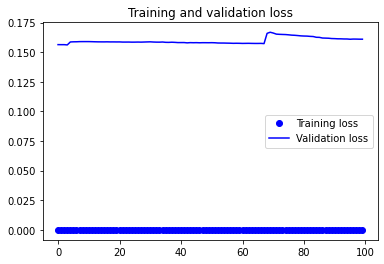

In [47]:
accuracy = classify_train.history['accuracy']
val_accuracy = classify_train.history['val_accuracy']
loss = classify_train.history['loss']
val_loss = classify_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [48]:
test_eval = full_model.evaluate(test_data, test_Y_one_hot, verbose=0)

In [49]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 6.443166255950928
Test accuracy: 0.7142857313156128


In [50]:
predicted_classes = full_model.predict(test_data)

In [51]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [52]:
predicted_classes.shape, test_labels.shape

((28,), (28,))

Found 20 correct labels


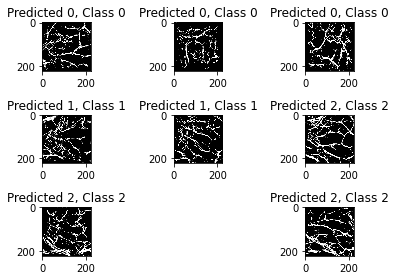

In [53]:
correct = np.where(predicted_classes==test_labels)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_data[correct].reshape(224,224), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_labels[correct]))
    plt.tight_layout()

Found 8 incorrect labels


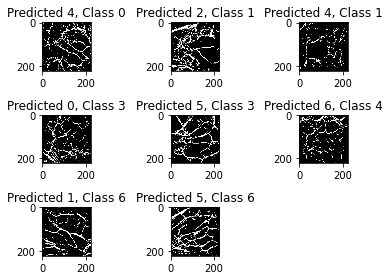

In [54]:
incorrect = np.where(predicted_classes!=test_labels)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_data[incorrect].reshape(224,224), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_labels[incorrect]))
    plt.tight_layout()

In [55]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_labels, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.75      0.75      0.75         4
     Class 1       0.67      0.50      0.57         4
     Class 2       0.80      1.00      0.89         4
     Class 3       1.00      0.50      0.67         4
     Class 4       0.60      0.75      0.67         4
     Class 5       0.67      1.00      0.80         4
     Class 6       0.67      0.50      0.57         4

    accuracy                           0.71        28
   macro avg       0.74      0.71      0.70        28
weighted avg       0.74      0.71      0.70        28



In [56]:
full_model.save_weights('./checkpoints/my_checkpoint3')

In [58]:
full_model.save("model.h5")

In [ ]:
model = tf.keras.models.load_model("./model.h5")
